In [2]:
from sklearn.pipeline import * 
from sklearn.naive_bayes import * 
from sklearn.cluster import *  
from sklearn.covariance import *  
from sklearn.cross_decomposition import *  
from sklearn.datasets import *  
from sklearn.decomposition import *  
from sklearn.ensemble import *  
from sklearn.feature_extraction import *  
from sklearn.feature_extraction.text import *  
from sklearn.feature_selection import *  
from sklearn.gaussian_process import *  
from sklearn.linear_model import *  
from sklearn.manifold import *  
from sklearn.metrics import *  
from sklearn.mixture import *  
from sklearn.model_selection import *  
from sklearn.neighbors import *  
from sklearn.neural_network import *  
from sklearn.preprocessing import *  
#from sklearn_pandas import DataFrameMapper
from sklearn.svm import *  
from sklearn.tree import *  

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [12]:
iris = load_iris()
X = iris.data
y = iris.target

In [9]:
#dir(iris), iris.data, iris.feature_names, iris.target_names
#print(iris.DESCR)
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
pca = PCA(n_components=2)

In [15]:
#preprocessing - fit and then transform 
X_r = pca.fit(X).transform(X) # convert 4Fs to 2Fs
X.shape, X_r.shape

((150, 4), (150, 2))

In [18]:
print("explained variance ratio", pca.explained_variance_ratio_)
target_names = iris.target_names

explained variance ratio [0.92461872 0.05306648]


c:\python37\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


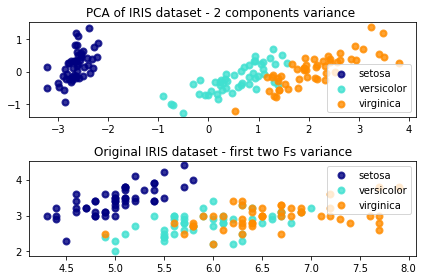

In [24]:
def draw_pca(X_r, y, target_names, ax, title):
    colors = ['navy', 'turquoise', 'darkorange']
    lw = 2
    #[0,1,2] are three Names 
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        #draw 2 pca features for each y = target_names,3 species 
        ax.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
    ax.legend(loc='best', shadow=False, scatterpoints=1)
    ax.set_title(title)
    
fig, (ax1,ax2) = plt.subplots(2,1)
draw_pca(X_r, y, target_names, ax1, 'PCA of IRIS dataset - 2 components variance ')
draw_pca(X, y, target_names, ax2, 'Original IRIS dataset - first two Fs variance')
fig.tight_layout()
fig.show()

Validation Plot 

https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html

Learning curve 

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [25]:
boston = load_boston()

In [26]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [29]:
bn = pd.read_csv("data/boston.csv")
bn[['medv', 'crim', 'rm']].corr()

,medv,crim,rm
medv,1.000000,-0.388305,0.695360
crim,-0.388305,1.000000,-0.219247
rm,0.695360,-0.219247,1.000000


In [33]:
bn.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [34]:
# Y = AX, X= rank N 

In [37]:
# Linear Regression with boston
scaler = StandardScaler()
X = scaler.fit_transform(boston.data)
y = boston.target

In [39]:
#split- test and train 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
#Fit 
m = LinearRegression().fit(X_train, y_train)
print(m.score(X_train, y_train), #R^2 for train data = Bias 
m.score(X_test, y_test))

0.7697699488741149 0.6354638433202131


In [43]:
scores = cross_val_score(m, X_train, y_train)
scores,np.mean(scores), np.std(scores)

(array([0.76260062, 0.56956022, 0.77935231, 0.70774465, 0.79031905]),
 0.7219153693705489,
 0.08129729908048475)

In [45]:
pd.DataFrame(np.hstack((np.array(m.intercept_), m.coef_)), columns=['Coeff'], 
                      index=['Intercept']+ boston.feature_names.tolist())
#Y = 22.40 -1.011*CRIM ...

,Coeff
Intercept,22.408806
CRIM,-1.011704
ZN,1.025581
INDUS,-0.039532
CHAS,0.607312
NOX,-1.804680
RM,2.645523
AGE,-0.197836
DIS,-3.018615
RAD,2.088382


In [47]:
#Predict 
mean_squared_error(y_test,m.predict(X_test))

29.78224509230235

array([[<AxesSubplot:xlabel='CRIM', ylabel='CRIM'>,
        <AxesSubplot:xlabel='ZN', ylabel='CRIM'>,
        <AxesSubplot:xlabel='INDUS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='CHAS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='NOX', ylabel='CRIM'>,
        <AxesSubplot:xlabel='RM', ylabel='CRIM'>,
        <AxesSubplot:xlabel='AGE', ylabel='CRIM'>,
        <AxesSubplot:xlabel='DIS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='RAD', ylabel='CRIM'>,
        <AxesSubplot:xlabel='TAX', ylabel='CRIM'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='CRIM'>,
        <AxesSubplot:xlabel='B', ylabel='CRIM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='CRIM'>],
       [<AxesSubplot:xlabel='CRIM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='INDUS', ylabel='ZN'>,
        <AxesSubplot:xlabel='CHAS', ylabel='ZN'>,
        <AxesSubplot:xlabel='NOX', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='AGE',

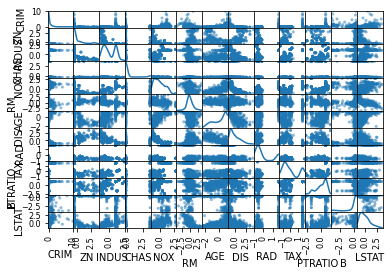

In [49]:
#Scatter matrix 
from pandas.plotting import scatter_matrix
scatter_matrix(pd.DataFrame(X, columns=boston.feature_names), diagonal='kde')

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

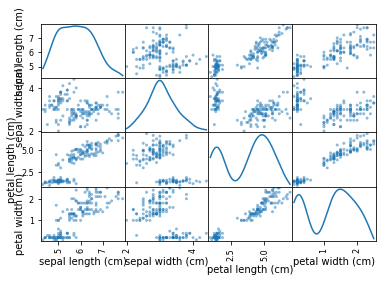

In [50]:
scatter_matrix(pd.DataFrame(iris.data, columns=iris.feature_names), diagonal='kde')

## Handling outlier - Robust Regression 
https://scikit-learn.org/stable/modules/linear_model.html#ransac-regression

## Using Regularizer 
https://scikit-learn.org/stable/modules/linear_model.html#elastic-net

## GLM

https://scikit-learn.org/stable/modules/linear_model.html#generalized-linear-regression

## Classification

In [60]:
iris = pd.read_csv('data/iris.csv')
X_raw = iris.iloc[:, 0:4].astype(np.float64)
y_raw = iris.Name
lenc = LabelEncoder()
y = lenc.fit_transform(y_raw)
sc = StandardScaler()
X = sc.fit_transform(X_raw)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
#Fit 
clf = LogisticRegression()
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train), #accuracy for train data = Bias 
clf.score(X_test, y_test))

0.9732142857142857 0.9736842105263158


In [65]:
# Pipeline
pipeline = Pipeline([('sc', sc),('clf', clf)])  #(tag, sklearn_object)
X1_train, X1_test, y1_train, y1_test = train_test_split(X_raw,y, random_state=0)
pipeline.fit(X1_train, y1_train)
pipeline.score(X1_train, y1_train), pipeline.score(X1_test, y1_test), \
  pipeline.predict(X1_test), lenc.inverse_transform(pipeline.predict(X1_test))

(0.9732142857142857,
 0.9736842105263158,
 array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
        0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2]),
 array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
        'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
        'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
        'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
        'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
        'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
        'Iris-virginica'], dtype=object))

In [67]:
# C - high value means weak Regularization
#Gridsearch
params = dict(clf__C=np.linspace(0.0001,100, num=1000)) 
#note __ to form the key pipelineTag__Hyeprparam
gs = RandomizedSearchCV(pipeline, params, random_state=0)
gs.fit(X1_train, y1_train)
gs.score(X1_train, y1_train), gs.score(X1_test, y1_test), \
  gs.predict(X1_test), lenc.inverse_transform(gs.predict(X1_test))

(0.9910714285714286,
 0.9736842105263158,
 array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
        0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2]),
 array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
        'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
        'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
        'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
        'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
        'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
        'Iris-virginica'], dtype=object))

In [68]:
#best estimator 
gs.best_estimator_

Pipeline(steps=[('sc', StandardScaler()),
                ('clf', LogisticRegression(C=68.4685))])

In [69]:
#cross_val
scores = cross_val_score(gs, X1_train, y1_train)
scores,np.mean(scores), np.std(scores)

(array([1.        , 0.95652174, 1.        , 0.95454545, 0.95454545]),
 0.9731225296442687,
 0.021957224367321962)

In [70]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Classification metrics

<pre>
Total case = N = a+b+c+d

        Actual True                      False 
Predicted 
True        a                            b (false positive/Alarm) - Type 1 error,alpha

False       c(false negative)(type-ii)   d

</pre>

Accuracy = (a+d)/N

b or c might not be zero

precision = a/(a+b) ie FP is zero, prec 100%

sensitivity/recall = a/(a+c), if FN is zero, sensitivity is 100%

eg Fire alarm, we want 100% sensitive

specificity = d/(b+d) ie FP is zero , spec - 100%


Value 1 Is the best


In [73]:
y1_pred = gs.predict(X1_test)
confusion_matrix(y1_test, y1_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [74]:
precision_recall_fscore_support(y1_test, y1_pred, average='micro')

(0.9736842105263158, 0.9736842105263158, 0.9736842105263158, None)